# Logistic Regression with a Neural Network mindset

Welcome to your first (required) programming blog! We will build a logistic regression classifier to recognize cats. This assignment will step you through how to do this with a Neural Network mindset, and will also hone your intuitions about deep learning.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.
- Use `np.dot(X,Y)` to calculate dot products.
- We are going to use MNIST dataset, you can use any other,try it out and have fun!

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import requests
from PIL import Image
from io import BytesIO

In [13]:
digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [47]:
print(digits.images.shape)  # Will show (1797, 8, 8)
print(digits.images[0])  # Prints the first 8×8 image

(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [48]:
print(digits.data.shape)

(1797, 64)


In [49]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [15]:
idx = np.where((digits.target == 0) | (digits.target == 1))[0]
print(idx)

[   0    1   10   11   20   21   30   36   42   47   48   49   55   56
   70   72   78   79   80   85   90   93   99  101  107  126  130  131
  140  141  150  151  160  166  172  177  178  179  185  186  200  202
  208  209  210  215  218  221  227  229  235  252  256  257  266  267
  276  277  286  292  298  303  304  305  311  312  326  328  334  335
  336  341  346  349  355  357  363  382  386  387  396  397  406  407
  416  422  428  433  434  435  441  442  456  458  464  465  466  471
  476  479  485  487  493  512  516  517  526  527  536  537  546  552
  558  563  564  565  571  572  586  588  594  595  596  601  606  609
  615  617  623  642  646  647  656  657  666  667  676  682  688  693
  694  695  701  702  716  718  724  725  726  731  736  739  745  747
  753  772  776  777  786  787  796  797  806  812  818  823  824  825
  831  832  846  848  854  855  856  861  866  869  875  877  883  902
  906  915  916  925  926  935  941  947  952  957  958  972  974  980
  981 

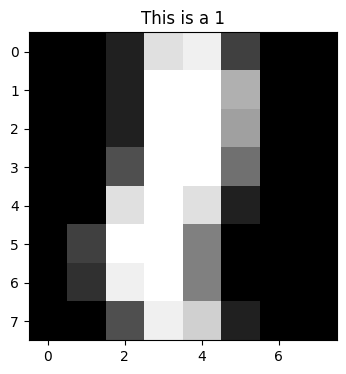

In [29]:
# you can take the above indexes and place it here you can either see a 1 in the plot or 0.
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the digits dataset
digits = datasets.load_digits()

# Display digit at index 0
plt.figure(figsize=(4, 4))
plt.imshow(digits.images[861], cmap='gray') # change the index so that you can change image of the number and .images[] get the 3d array of the image
plt.title(f"This is a {digits.target[861]}") # change the index so that you can change the label of the number
# plt.axis('off')
plt.show()# you can see it is a 8 * 8 image which means there are maximum 16 pixels (0 to 16)
# 0 represents white/blank space
# 16 represents the darkest shade (black)

In [33]:

def load_basic_dataset():
    """
    Load a simple dataset for binary classification: digits 0 and 1 from MNIST
    This dataset is available through scikit-learn and doesn't require downloading files
    
    Returns:
    X_train -- training set features
    y_train -- training set labels
    X_test -- test set features
    y_test -- test set labels
    classes -- class labels
    """
    # Load digits dataset from sklearn
    digits = datasets.load_digits()
    
    # We'll use only digit 0 and 1 to make it a binary classification like cat/non-cat
    idx = np.where((digits.target == 0) | (digits.target == 1))[0]
    X = digits.data[idx] # this will get the 2d array of the image
    y = digits.target[idx] # gets 1d array from 0 to 9, but we will only get either 0 or 1 because idx's are the indexes of 1's and 0's
    
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Reshape to the format (features, examples)
    X_train = X_train.T / 16.0  # Normalize to [0,1] - maximum value of a pixel in MNIST is 16
    X_test = X_test.T / 16.0
    y_train = y_train.reshape(1, -1)
    y_test = y_test.reshape(1, -1)
    
    classes = np.array(["non-digit-1", "digit-1"])
    
    return X_train, y_train, X_test, y_test, classes

## Sigmoid Function

In [35]:
# We have divided the data into train and test data.
# Now as we know in logistic regression we wont take the data directly, we will apply sigmoid function as it is a classifcation model
# We need to make sure solution will be between 0 and 1 instead of 0 to infinity, so that's the reason we apply sigmoid function 
# We all know the formula of sigmoid function is 1/(1+e^-x). 
# So let's make the code to  sigmoid funciton
def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Arguments:
    z -- A scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))
    return s

## Initializing parameters
Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

We have an image of 8*8 so that means an array will be of size 64.(no of features)
dim = 64

In [36]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    w = np.zeros((dim, 1))
    b = 0.0
    
    return w, b

## Forward and Backward propagation
Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.
## propagate
Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using for backward propagation: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [39]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    
    Return:
    grads -- dictionary containing the gradients of the weights and bias
            (dw -- gradient of the loss with respect to w, thus same shape as w)
            (db -- gradient of the loss with respect to b, thus same shape as b)
    cost -- negative log-likelihood cost for logistic regression
    """
    
    m = X.shape[1] # number of training examples we are using for the problem that means number of images(2d arrays)
    
    # Forward propagation
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    
    # Add epsilon to avoid log(0)
    epsilon = 1e-10
    cost = -np.sum(Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon)) / m # dividing by m to get the average cost
    
    # Backward propagation
    dw = np.dot(X, (A - Y).T) / m # dividing by m to get the average gradient
    db = np.sum(A - Y) / m
    
    cost = float(np.squeeze(cost))
    
    grads = {"dw": dw, # change in weight and change in bias
             "db": db}
    
    return grads, cost

## Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

<a name='ex-6'></a>
### Exercise 6 - optimize
Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [40]:

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1) (64*64*3)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    w = w.copy()
    b = float(b)
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs
        # For every 100 iterations we will record the cost instead of recording for every single iterations
        if i % 100 == 0:
            costs.append(cost)
            
            # Print the cost every 100 training iterations
            if print_cost:
                print(f"Cost after iteration {i}: {cost}")
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

## predict
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [41]:
def predict(w, b, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 1, 1) as this is gray scale image, if it is color image then * 3 instead of * 1.
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 1, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    """
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute probabilities
    A = sigmoid(np.dot(w.T, X) + b)
    
    # Convert probabilities to 0/1 predictions
    # you can either use Z.shape[1] in place of A as both have same shapes but you need to initialize or take Z as the parameter of the function
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    
    return Y_prediction

## Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

<a name='ex-8'></a>
### model
Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - parameters, grads, costs for the outputs of optimize()

In [42]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_features, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_features, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # Initialize parameters
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test errors
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    
    print(f"Train accuracy: {train_accuracy:.2f}%")
    print(f"Test accuracy: {test_accuracy:.2f}%")
    
    d = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    
    return d

In [43]:
def test_with_online_image(url, model_dict, shape):
    """
    Tests the model with an image from a URL
    
    Arguments:
    url -- URL of the image
    model_dict -- dictionary containing the model parameters
    shape -- the shape of the image expected by the model
    
    Returns:
    prediction -- the prediction made by the model (0 or 1)
    """
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((8, 8)).convert('L')  # Resize to 8x8 and grayscale
    
    # Convert to numpy array and flatten
    img_array = np.array(img).flatten() / 255.0
    
    # Reshape to match the model's expected input shape
    img_array = img_array.reshape(-1, 1)
    
    # Make prediction
    prediction = predict(model_dict["w"], model_dict["b"], img_array)
    
    return int(prediction[0, 0])

In [44]:
def display_example(X, y, idx, title):
    """
    Display an example from the dataset
    
    Arguments:
    X -- dataset features, shape (features, examples)
    y -- dataset labels, shape (1, examples)
    idx -- index of the example to display
    title -- title for the plot
    """
    # Get the example and reshape to 8x8
    example = X[:, idx].reshape(8, 8)
    
    plt.figure(figsize=(4, 4))
    plt.imshow(example, cmap='gray')
    plt.title(f"{title}\nLabel: {int(y[0, idx])}")
    plt.axis('off')
    plt.show()

X_train shape: (64, 288)
y_train shape: (1, 288)
X_test shape: (64, 72)
y_test shape: (1, 72)


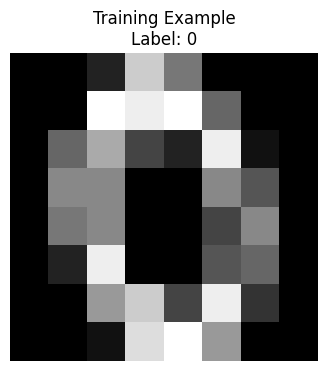

Cost after iteration 0: 0.6931471803599453
Cost after iteration 100: 0.08281710637011214
Cost after iteration 200: 0.047486815439146984
Cost after iteration 300: 0.034349336179210294
Cost after iteration 400: 0.02731166509589155
Cost after iteration 500: 0.02286176907804792
Cost after iteration 600: 0.019765379822246194
Cost after iteration 700: 0.017471759670084193
Cost after iteration 800: 0.015696211395772913
Cost after iteration 900: 0.014275962689337963
Cost after iteration 1000: 0.013110835945881909
Cost after iteration 1100: 0.012135603435035898
Cost after iteration 1200: 0.011305858828722553
Cost after iteration 1300: 0.01059025804893486
Cost after iteration 1400: 0.00996600491169902
Cost after iteration 1500: 0.00941609712160929
Cost after iteration 1600: 0.008927578173364282
Cost after iteration 1700: 0.00849038969058931
Cost after iteration 1800: 0.008096595766510346
Cost after iteration 1900: 0.0077398453105822045
Train accuracy: 100.00%
Test accuracy: 100.00%


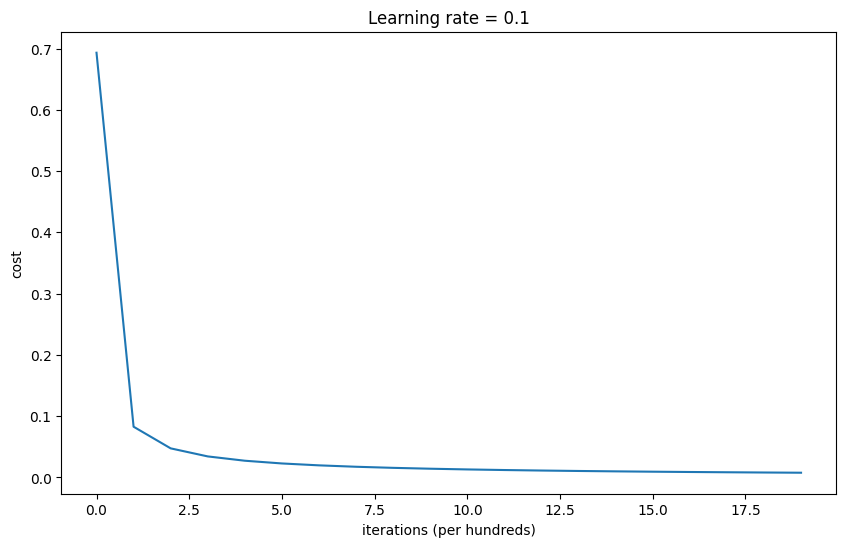

Training a model with learning rate: 0.5
Train accuracy: 100.00%
Test accuracy: 100.00%

-------------------------------------------------------

Training a model with learning rate: 0.1
Train accuracy: 100.00%
Test accuracy: 100.00%

-------------------------------------------------------

Training a model with learning rate: 0.01
Train accuracy: 100.00%
Test accuracy: 100.00%

-------------------------------------------------------



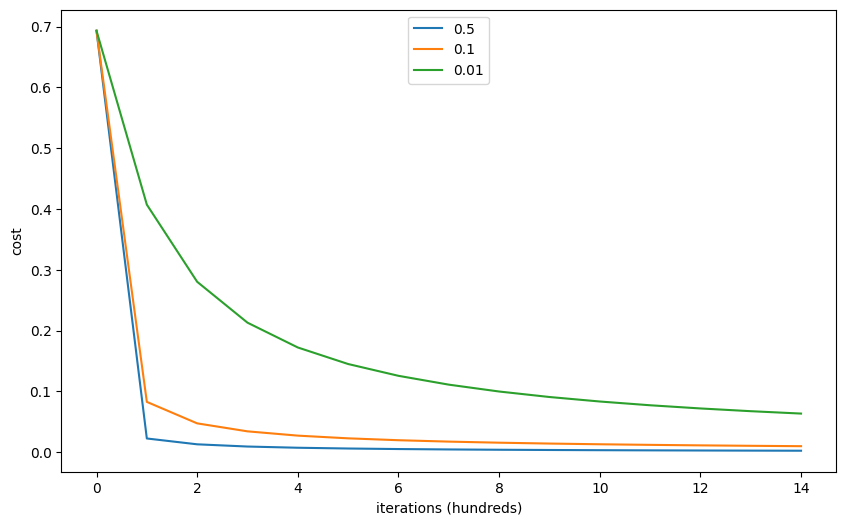

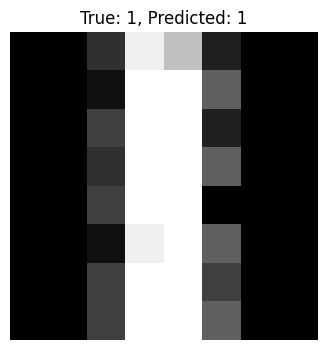

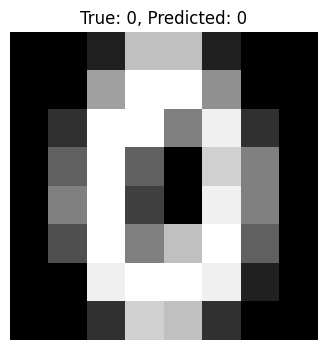

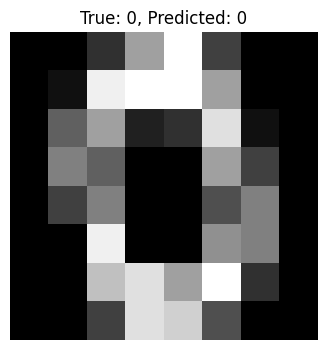

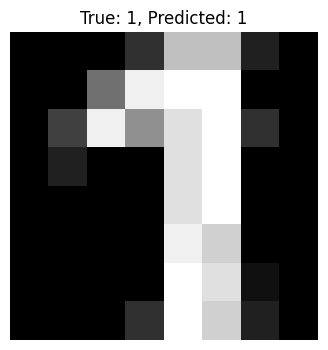

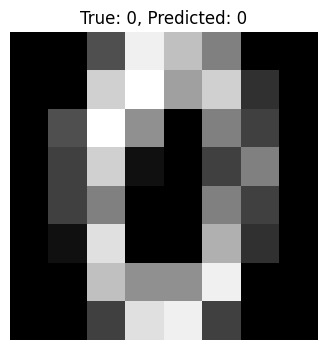

In [45]:
def main():
    # Load dataset
    X_train, y_train, X_test, y_test, classes = load_basic_dataset()
    
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")
    
    # Display a training example
    if X_train.shape[1] > 0:
        display_example(X_train, y_train, 0, "Training Example")
    
    # Train logistic regression model
    logistic_regression_model = model(
        X_train, y_train, X_test, y_test,
        num_iterations=2000, learning_rate=0.1, print_cost=True
    )
    
    # Plot learning curve
    costs = np.squeeze(logistic_regression_model['costs'])
    plt.figure(figsize=(10, 6))
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title(f"Learning rate = {logistic_regression_model['learning_rate']}")
    plt.show()
    
    # Try different learning rates
    learning_rates = [0.5, 0.1, 0.01]
    models = {}
    
    plt.figure(figsize=(10, 6))
    
    for lr in learning_rates:
        print(f"Training a model with learning rate: {lr}")
        models[str(lr)] = model(
            X_train, y_train, X_test, y_test,
            num_iterations=1500, learning_rate=lr, print_cost=False
        )
        print('\n' + "-------------------------------------------------------" + '\n')
        
        # Plot cost
        plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))
    
    plt.ylabel('cost')
    plt.xlabel('iterations (hundreds)')
    plt.legend(loc='upper center')
    plt.show()
    
    # Display some test examples with predictions
    for i in range(min(5, X_test.shape[1])):
        # Get example and prediction
        example = X_test[:, i].reshape(8, 8)
        prediction = logistic_regression_model["Y_prediction_test"][0, i]
        true_label = y_test[0, i]
        
        # Display
        plt.figure(figsize=(4, 4))
        plt.imshow(example, cmap='gray')
        plt.title(f"True: {int(true_label)}, Predicted: {int(prediction)}")
        plt.axis('off')
        plt.show()

if __name__ == "__main__":
    main()